<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

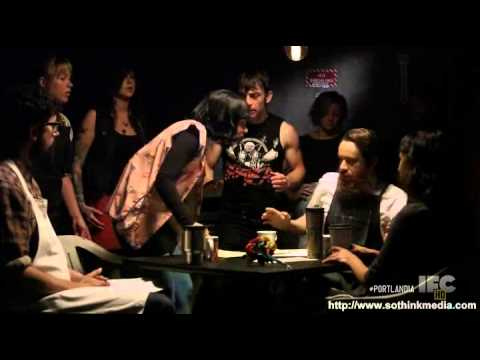

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/jonathansokoll/Documents/lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [35]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [36]:
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer
from spacy.matcher import Matcher

nlp = spacy.load('en_core_web_md')

In [54]:
import re
def finder(text):
    
    #finding and extracting dates to place in seperate column of shops df...
    
    alpha = re.findall(r'\b[0-3]?[0-9]/[0-3]?[0-9]/(?:[0-9]{2})?[0-9]{2}\b', text)
    
    return(alpha[0])

def date_remover(df):
    
    #removing date from full_review_text

    gamma = []
    for i, x in enumerate(df['full_review_text']):
        alpha = x
        beta = df['date_reviewed'][i]
        alpha = alpha.replace(beta, '')
        gamma.append(alpha)
    return gamma

shops['date_reviewed'] = shops['full_review_text'].apply(lambda x: finder(x))
shops['full_review_text'] = date_remover(shops)

In [60]:
def classifier(text):
    
    #generating new column: 0 or 1 for bad or good location:
    
    fin = []
    alpha = text[1]
    alpha = int(alpha)
    if alpha >= 4:
        beta=1
    else:
        beta=0
    
    return(beta)
        
shops['good/bad'] = shops['star_rating'].apply(lambda x: classifier(x))

In [94]:
def tokenize(text):

    #basic tokenization
    
    lower = text.lower()
    lower_no_punc = re.sub('[^a-z 0-9]', '', lower)
    tokens = lower_no_punc.split()
    
    return tokens

shops['tokens'] = shops['full_review_text'].apply(lambda x: tokenize(x))

def stop_word(token):

    #removes basic stop words
    
    stop_words = ["1", "i", "the", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
    for x in token:
        if x in stop_words:
            token.remove(x)
    return(token)

shops['tokens'] = shops['tokens'].apply(lambda x: stop_word(x))

In [96]:
shops['tokens']

0       [checkin, love, love, loved, atmosphere, every...
1       [listed, date, night, austin, ambiance, austin...
2       [checkin, listed, brunch, spots, loved, eclect...
3       [cool, decor, good, drinks, nice, seating, how...
4       [checkin, are, located, within, northcross, ma...
                              ...                        
7611    [actually, step, restaurant, chance, now, one,...
7612    [ok, steeping, room, awesome, do, many, great,...
7613    [loved, coming, for, tea, atmosphere, pretty, ...
7614    [food, just, average, booths, didnt, feel, cle...
7615    [finally, stopped, for, lunch, my, colleague, ...
Name: tokens, Length: 7616, dtype: object

In [104]:
stop_words = ["1", "i", "the", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
for x in stop_words:
    if word_counts[x]:
        word_counts.pop(x)

In [119]:
def count(tokens):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """
    # stores the count of each token
    word_counts = Counter()
    
    # stores the number of docs that each token appears in 
    appears_in = Counter()

    total_docs = len(tokens)

    for token in tokens:
        # stores count of every appearance of a token 
        word_counts.update(token)
        # use set() in order to not count duplicates, thereby count the num of docs that each token appears in
        appears_in.update(set(token))
    
    #removing basic stop words from analysis
    
    stop_words = ["coffee", "place", "1", "i", "the", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
    for x in stop_words:
        if word_counts[x]:
            word_counts.pop(x)
        if appears_in[x]:
            appears_in.pop(x)

    # build word count dataframe
    temp = zip(word_counts.keys(), word_counts.values())
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    # rank the the word counts
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    # calculate the percent total of each token
    wc['pct_total'] = wc['count'].apply(lambda token_count: token_count / total)

    # calculate the cumulative percent total of word counts 
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    # create dataframe for document stats
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    
    # merge word count stats with doc stats
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [120]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,date_reviewed,good/bad
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! E...,5.0 star rating,"[checkin, love, love, loved, atmosphere, every...",11/25/2016,1
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Au...",4.0 star rating,"[listed, date, night, austin, ambiance, austin...",12/2/2016,1
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved th...,4.0 star rating,"[checkin, listed, brunch, spots, loved, eclect...",11/30/2016,1
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating H...,2.0 star rating,"[cool, decor, good, drinks, nice, seating, how...",11/25/2016,0
4,The Factory - Cafe With a Soul,1 check-in They are located within the North...,4.0 star rating,"[checkin, are, located, within, northcross, ma...",12/3/2016,1


In [121]:
shops_good = shops.loc[shops['good/bad']==1]
shops_bad = shops.loc[shops['good/bad']==0]

In [125]:
good_words = count(shops_good['tokens'])
print(good_words.shape)
display(good_words.head(50))

bad_words = count(shops_bad['tokens'])
print(bad_words.shape)
bad_words.columns = ['word', 'bad_appears_in', 'bad_count', 'bad_rank', 'bad_pct_total', 'bad_cul_pct_total', 'bad_appears_in_pct']
display(bad_words.head(50))

(17650, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
126,great,2492,3453,1.0,0.011171,0.011171,0.405863
211,good,2192,3096,2.0,0.010016,0.021186,0.357003
195,like,1559,2212,3.0,0.007156,0.028342,0.253909
53,austin,1547,1969,4.0,0.006370,0.034712,0.251954
392,get,1441,1865,5.0,0.006033,0.040746,0.234691
216,really,1325,1816,6.0,0.005875,0.046621,0.215798
276,one,1344,1731,7.0,0.005600,0.052221,0.218893
37,love,1322,1725,8.0,0.005581,0.057801,0.215309
410,also,1360,1702,9.0,0.005506,0.063307,0.221498
2,checkin,1600,1605,10.0,0.005192,0.068499,0.260586


(9292, 7)


,word,bad_appears_in,bad_count,bad_rank,bad_pct_total,bad_cul_pct_total,bad_appears_in_pct
26,good,596,877,1.0,0.009809,0.009809,0.403794
4,like,565,876,2.0,0.009798,0.019607,0.382791
136,get,417,562,3.0,0.006286,0.025892,0.282520
176,one,363,556,4.0,0.006219,0.032111,0.245935
403,really,354,501,5.0,0.005603,0.037714,0.239837
99,would,356,486,6.0,0.005436,0.043150,0.241192
44,food,310,484,7.0,0.005413,0.048563,0.210027
232,time,353,478,8.0,0.005346,0.053910,0.239160
117,great,344,466,9.0,0.005212,0.059122,0.233062
218,back,367,460,10.0,0.005145,0.064266,0.248645


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [126]:
combined = pd.merge(good_words, bad_words, how='inner', on='word')

In [129]:
combined['difference_is'] = combined['appears_in_pct'] - combined['bad_appears_in_pct']

In [133]:
pent_ult = combined.sort_values('difference_is', ascending=False)
final = pent_ult[['word', 'appears_in_pct', 'bad_appears_in_pct']]

In [137]:
final.head(10)

,word,appears_in_pct,bad_appears_in_pct
0,great,0.405863,0.233062
18,delicious,0.191857,0.056233
11,friendly,0.227850,0.120596
21,best,0.165961,0.058943
7,love,0.215309,0.120596
3,austin,0.251954,0.163279
37,checkins,0.151303,0.067751
47,amazing,0.111075,0.030488
56,perfect,0.101303,0.026423
53,favorite,0.100977,0.031843


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

